### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

### Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data


In [94]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [95]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

In [96]:
# Importing dataset

Leads_Info = pd.read_csv('Leads.csv')
Leads_Info.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [97]:
# checking the shape of the data 
print(" Shape ")
Leads_Info.shape

 Shape 


(9240, 37)

In [98]:
# checking non null count and datatype of the variables
Leads_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [99]:
#Check Columns having null values
Leads_Info.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [100]:
# Checking the summary of the dataset
Leads_Info.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Step 2: Data Cleaning

In [101]:
# Checking the number of missing values in each column
Leads_Info.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [102]:
# check for percentage of null values in each column

percent_missing = round(100*(Leads_Info.isnull().sum()/len(Leads_Info.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As it is clearly seen there are a lot of columns which have high number of missing values.Let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [103]:
# Droping all the columns in which greater than 3000 NULL Values 
for c in Leads_Info.columns:
    if Leads_Info[c].isnull().sum()>3000:
        Leads_Info.drop(c, axis=1,inplace=True)

In [104]:
Leads_Info.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [105]:
# check for percentage of null values in each column after dropping columns having more than 3000 null values

percent_missing = round(100*(Leads_Info.isnull().sum()/len(Leads_Info.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [106]:
# Check if there are any duplicate values in the dataset

Leads_Info[Leads_Info.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 31 columns]

There are no duplicate values in the data.

In [107]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

Leads_Info['Specialization'] = Leads_Info['Specialization'].replace('Select', np.nan)
Leads_Info['How did you hear about X Education'] = Leads_Info['How did you hear about X Education'].replace('Select', np.nan)
Leads_Info['Lead Profile'] = Leads_Info['Lead Profile'].replace('Select', np.nan)
Leads_Info['City'] = Leads_Info['City'].replace('Select', np.nan)

    
Let us see and decide whether we need to impute values in the "Country" column or drop the columns.

In [108]:
# Lets check the value counts for each values in the country column

Leads_Info.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [109]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(Leads_Info[Leads_Info['Country'] == 'India'])/len(Leads_Info['Country']),2)
print(country_percentage)

70.26


In [110]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

Leads_Info = Leads_Info.drop(['Country'], axis=1)

In [111]:
# Check the value counts for the column Lead Source

Leads_Info['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [112]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

Leads_Info['Lead Source'] = Leads_Info['Lead Source'].replace('google', 'Google')
Leads_Info['Lead Source'] = Leads_Info['Lead Source'].replace(np.nan, 'Google')

In [113]:
# Check the value counts for the column Total Visits

Leads_Info['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [114]:
# Check the median of column 

Leads_Info['TotalVisits'].median()

3.0

In [115]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

Leads_Info['TotalVisits'] = Leads_Info['TotalVisits'].replace(np.nan, Leads_Info['TotalVisits'].median())

In [116]:
# Check the value counts for Page Views Per Visit

Leads_Info['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [117]:
# Check the median of the column

Leads_Info['Page Views Per Visit'].median()

2.0

In [118]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

Leads_Info['Page Views Per Visit'] = Leads_Info['Page Views Per Visit'].replace(np.nan, Leads_Info['Page Views Per Visit'].median())

In [119]:
# Check the value counts for the column Last Activity

Leads_Info['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [120]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

Leads_Info['Last Activity'] = Leads_Info['Last Activity'].replace(np.nan, 'Not Sure')

In [121]:
# Check the value counts for the column "What is your current Occupation"

Leads_Info['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [122]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

Leads_Info['What is your current occupation'] = Leads_Info['What is your current occupation'].replace(np.nan, 'No Information')

In [123]:
# Check the value counts for the column What matters most to you in choosing a course 

Leads_Info['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [124]:
matters_most_percentage = round(100*len(Leads_Info[Leads_Info['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(Leads_Info['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [125]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

Leads_Info = Leads_Info.drop(['What matters most to you in choosing a course'], axis=1)

In [126]:
#checking value counts of "City" column
Leads_Info['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Mumbai has highest numbers of leads

As we might be able to interpret, the variable City wont be of any use in our analysis. So its best that we drop it.

In [127]:
# dropping the "City" feature
Leads_Info.drop(['City'], axis = 1, inplace = True)

In [128]:
# check for percentage of null values in each column

percent_missing = round(100*(Leads_Info.isnull().sum()/len(Leads_Info.index)), 2)
print(percent_missing)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                              36.58
How did you hear about X Education          78.46
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data 
concentrated towards one value

In [129]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

Leads_Info = Leads_Info.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [130]:
# Let us drop the following columns that have more than 30% null values
# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile


Leads_Info = Leads_Info.drop(['Specialization', 'How did you hear about X Education', 'Lead Profile'], axis=1)

In [131]:
Leads_Info.shape

(9240, 20)

In [132]:
Leads_Info.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [133]:
Leads_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

##### Outlier Treatment

In [134]:
# Checking outliers at 25%,50%,75%,90%,95% and above
Leads_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.438636                   487.698268   
std     23405.995698     0.486714     4.819024                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
90%    650506.100000     1.000000     7.000000                  1380.000000   
95%    655404.050000     1.000000    10.000000                  1562.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

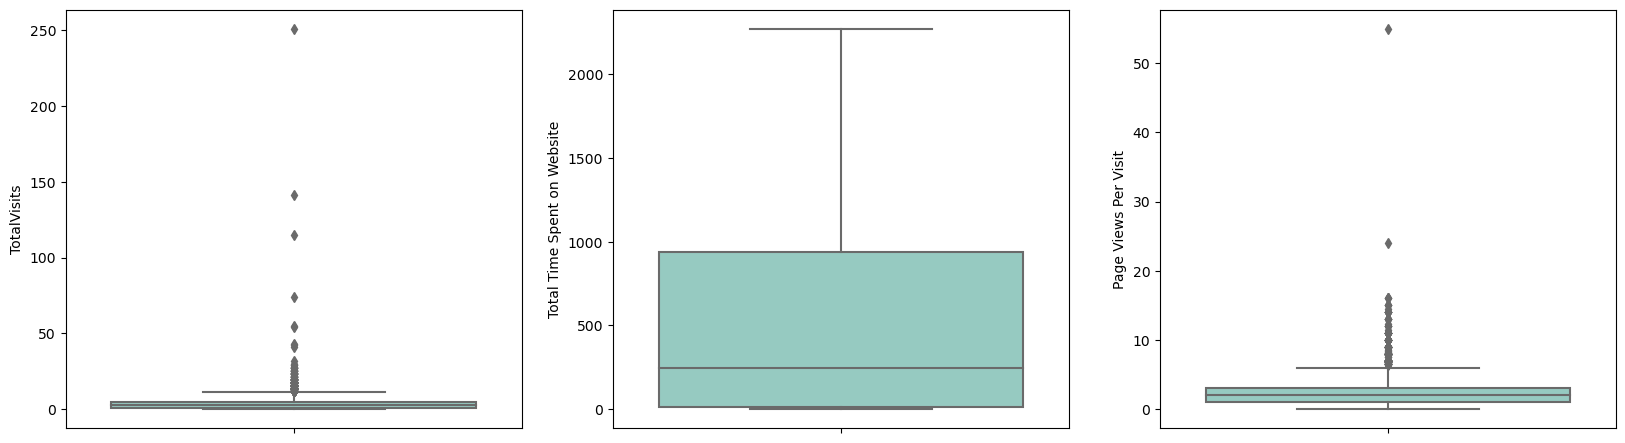

In [135]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = Leads_Info)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = Leads_Info)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = Leads_Info)
plt.show()

In [136]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = Leads_Info['TotalVisits'].quantile(0.99)
Leads_Info = Leads_Info[Leads_Info["TotalVisits"] < nn_quartile_total_visits]
Leads_Info["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [137]:
# Checking outliers at 25%,50%,75%,90%,95% and above

Leads_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9141.00000  9141.000000  9141.000000                  9141.000000   
mean   617233.45192     0.385406     3.179740                   486.074609   
std     23413.72193     0.486718     2.913631                   547.856302   
min    579533.00000     0.000000     0.000000                     0.000000   
25%    596519.00000     0.000000     1.000000                    10.000000   
50%    615563.00000     0.000000     3.000000                   247.000000   
75%    637414.00000     1.000000     5.000000                   933.000000   
90%    650514.00000     1.000000     7.000000                  1379.000000   
95%    655406.00000     1.000000     9.000000                  1561.000000   
99%    659592.80000     1.000000    13.000000                  1839.600000   
max    660737.00000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9141.000000  
mean               2.329506  
std                2.046673  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               16.000000

In [138]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = Leads_Info['Page Views Per Visit'].quantile(0.99)
Leads_Info = Leads_Info[Leads_Info["Page Views Per Visit"] < nn_quartile_page_visits]
Leads_Info["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [139]:
# Checking outliers at 25%,50%,75%,90%,95% and above
Leads_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9029.000000  9029.000000  9029.000000                  9029.000000   
mean   617223.248422     0.385092     3.087164                   483.133016   
std     23372.383121     0.486644     2.801244                   547.420675   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596530.000000     0.000000     1.000000                     7.000000   
50%    615645.000000     0.000000     3.000000                   245.000000   
75%    637360.000000     1.000000     4.000000                   929.000000   
90%    650463.200000     1.000000     7.000000                  1378.000000   
95%    655351.600000     1.000000     8.000000                  1558.000000   
99%    659577.800000     1.000000    13.000000                  1839.720000   
max    660737.000000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9029.000000  
mean               2.226383  
std                1.823395  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                7.000000  
max                8.000000

In [140]:
# Determine the percentage of data retained

num_data = round(100*(len(Leads_Info)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

In [141]:
Leads_Info.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [142]:
Leads_Info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

### Step 3: Data Analysis
Let us try and understand the data now based on each columns effect on the conversion rates

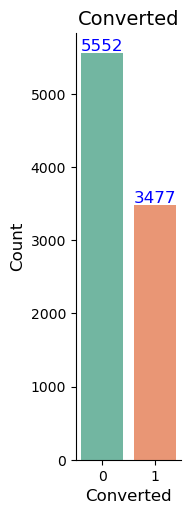

In [143]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=Leads_Info, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

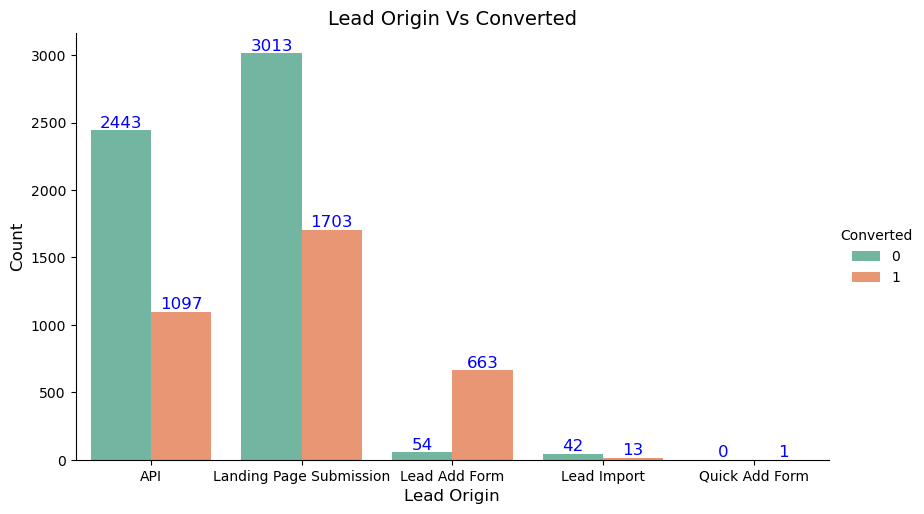

In [144]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission

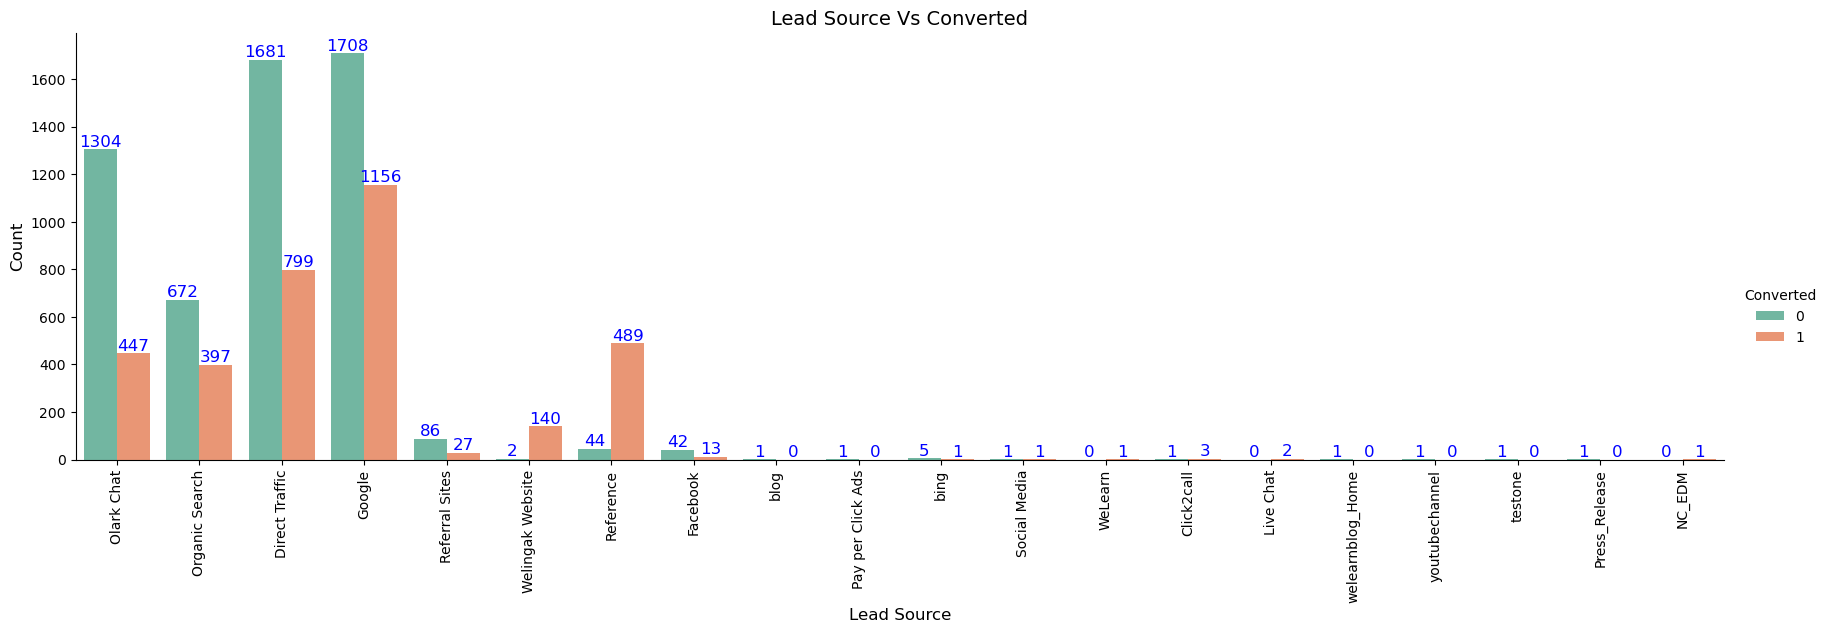

In [145]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google followed by Direct Traffic

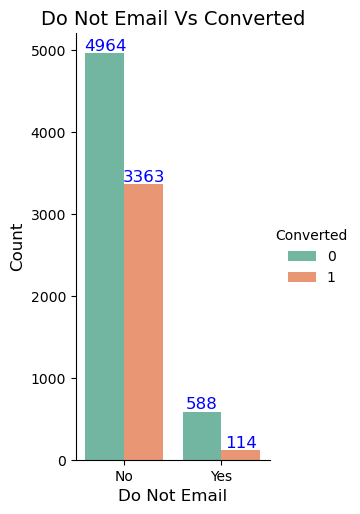

In [146]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

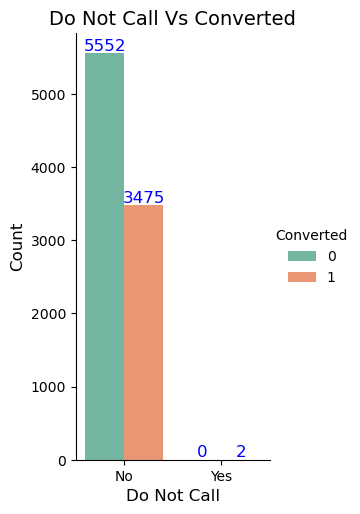

In [147]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

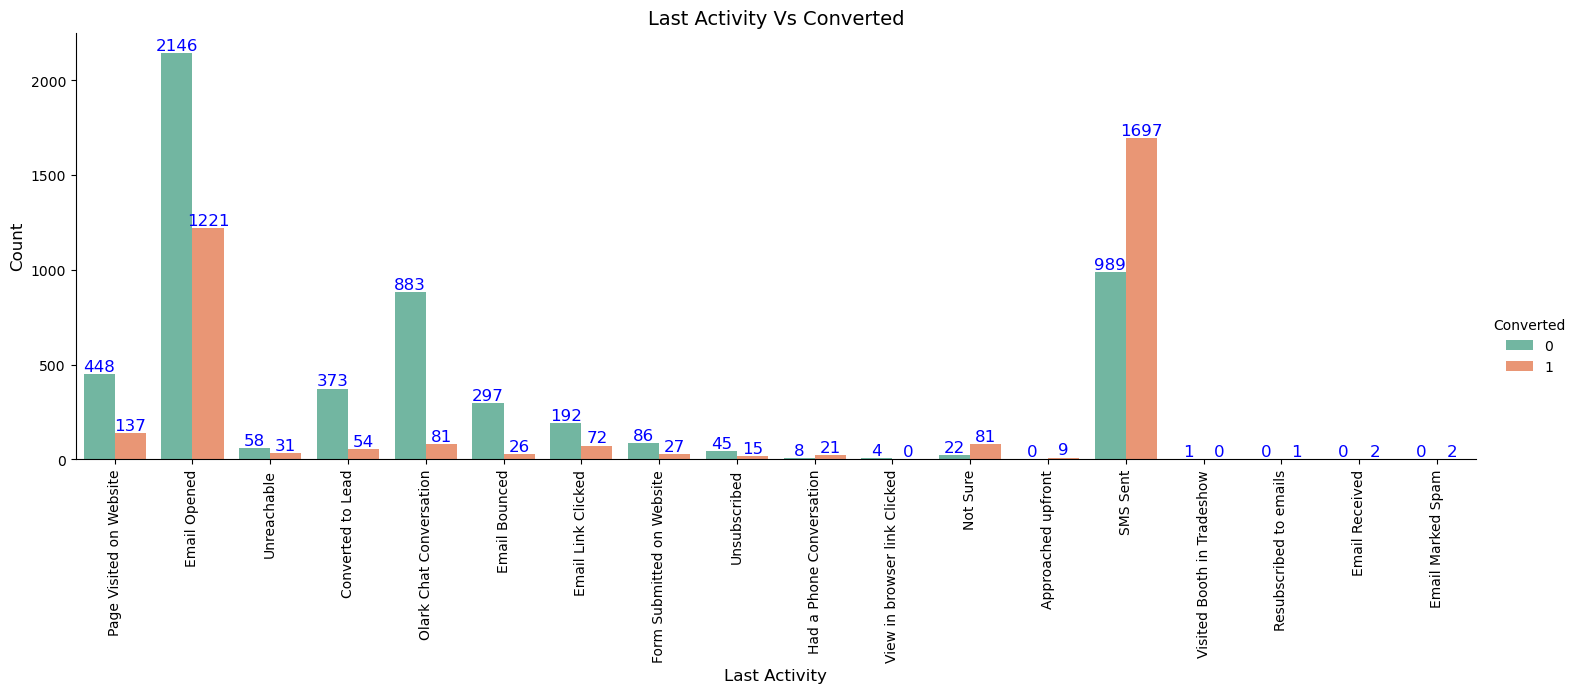

In [148]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

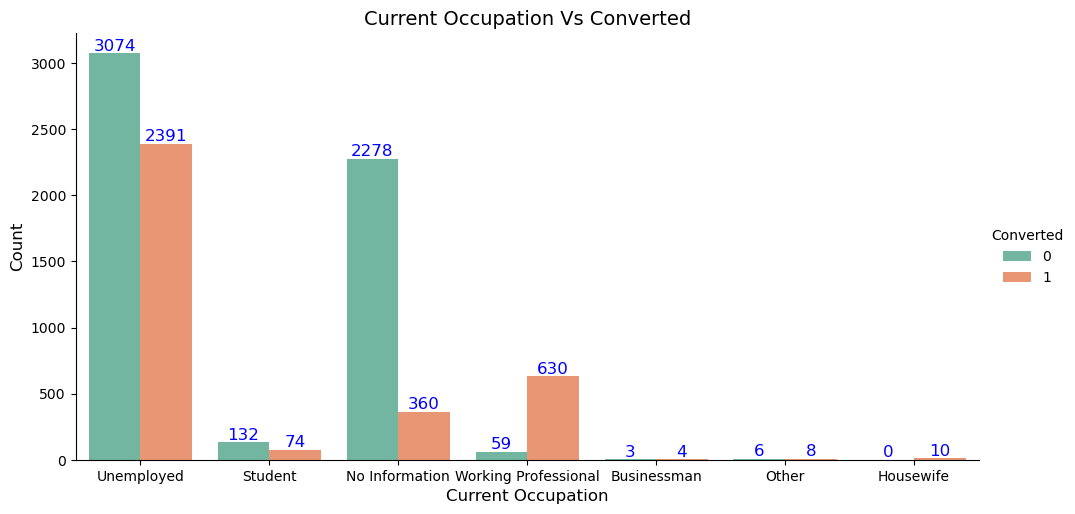

In [149]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
    - Out of 7 business men, 4 got converted
    - Out 10 housewives, all 10 leads got converted.

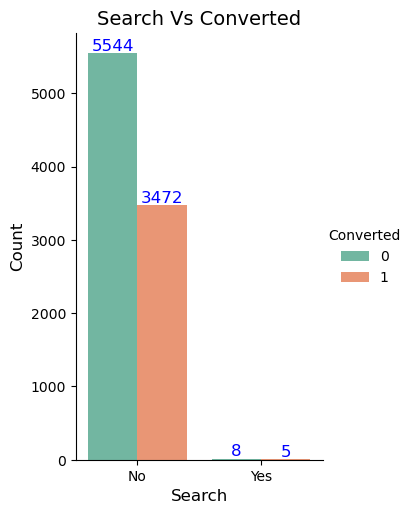

In [150]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

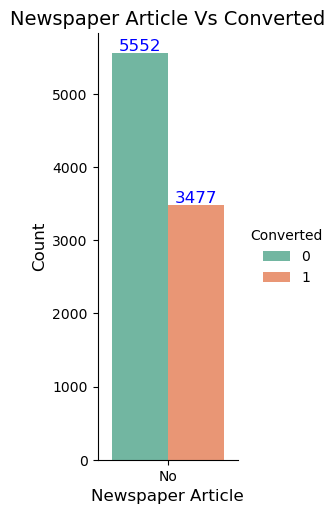

In [151]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [152]:
# Dropping Newspaper Article

Leads_Info = Leads_Info.drop(['Newspaper Article'], axis=1)

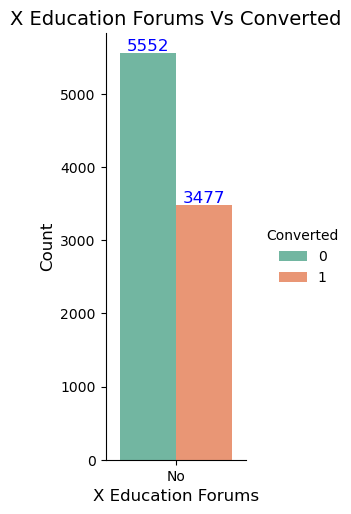

In [153]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [154]:
# Dropping X Education Forum column

Leads_Info = Leads_Info.drop(['X Education Forums'], axis=1)

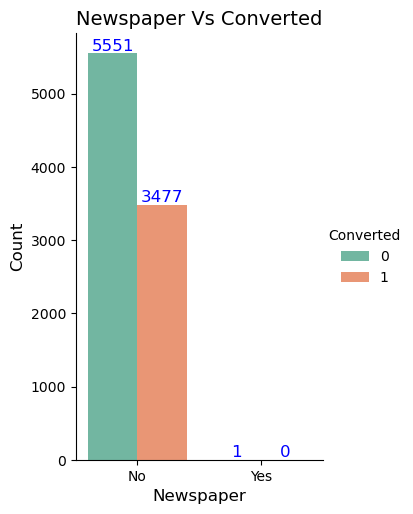

In [155]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [156]:
# Dropping Newspaper column

Leads_Info = Leads_Info.drop(['Newspaper'], axis=1)

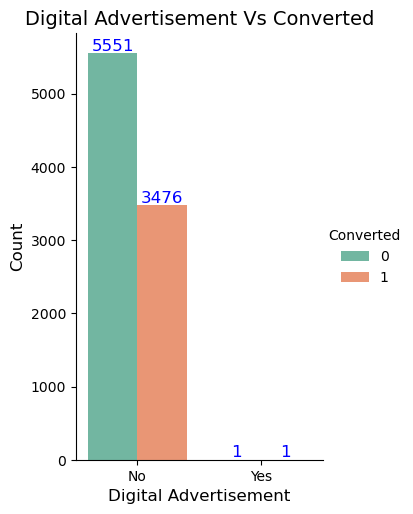

In [157]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

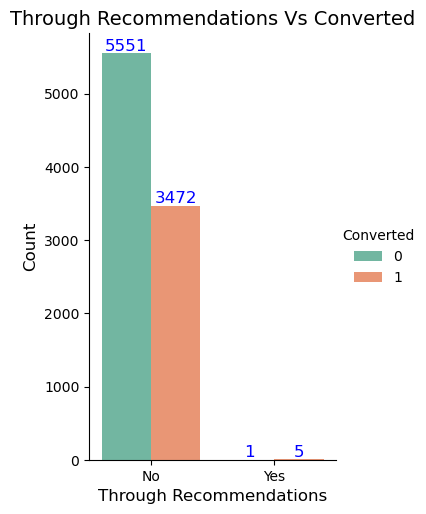

In [158]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

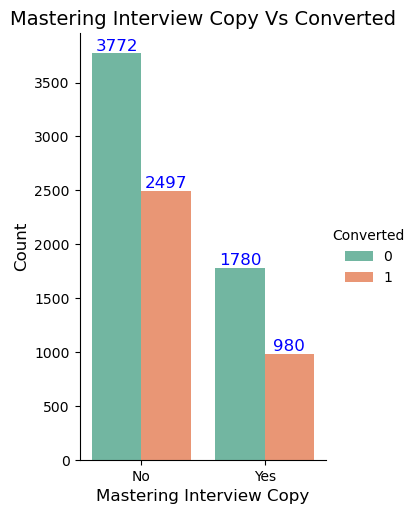

In [159]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=Leads_Info, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

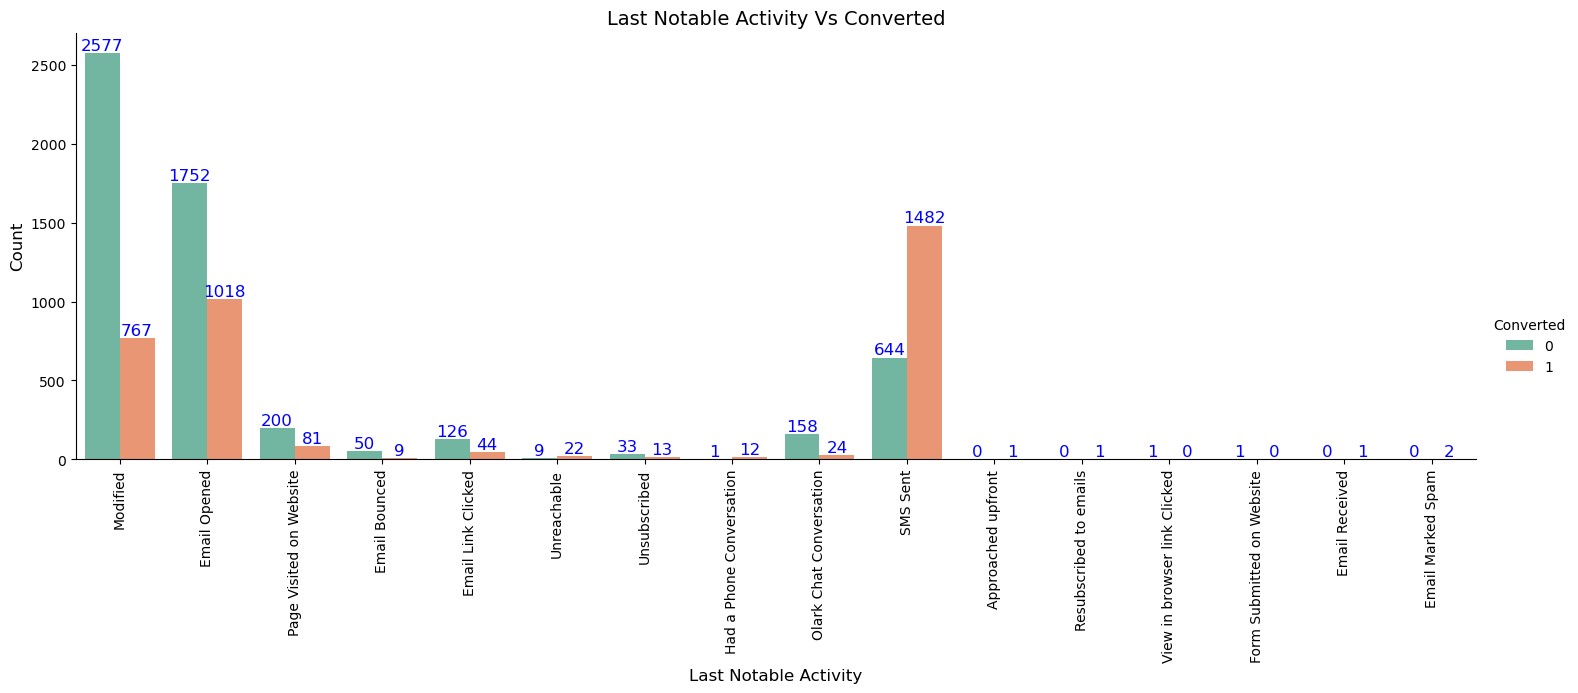

In [160]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=Leads_Info, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

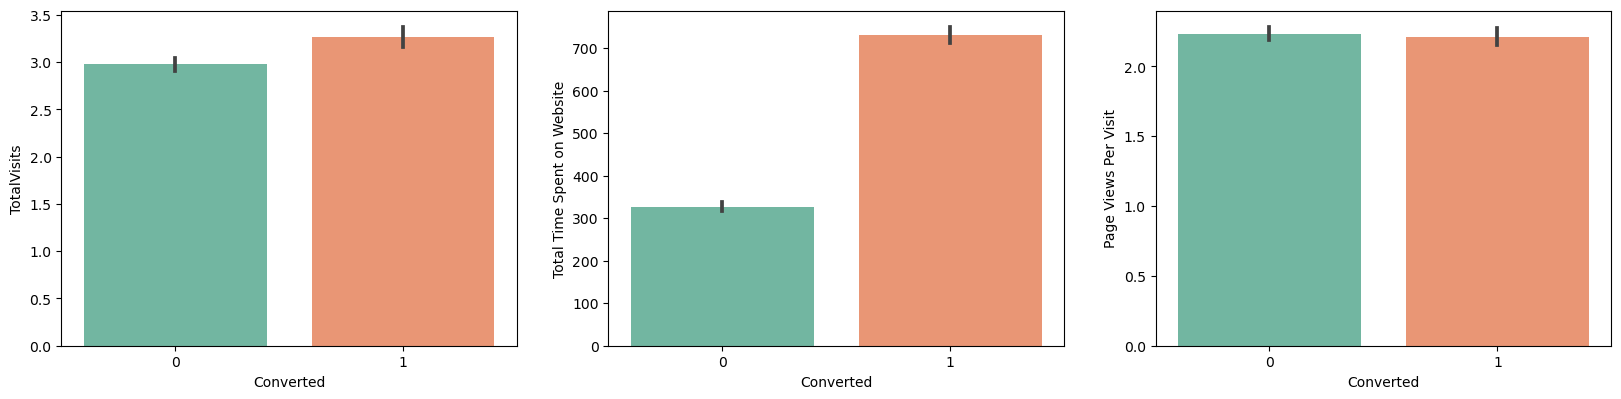

In [161]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = Leads_Info)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = Leads_Info)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = Leads_Info)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

In [162]:
Leads_Info.shape

(9029, 17)

In [163]:
Leads_Info.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [164]:
Leads_Info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

## Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [165]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
Leads_Info[variablelist] = Leads_Info[variablelist].apply(binary_map)

In [166]:
Leads_Info.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  What is your current occupation  Search  Digital Advertisement  \
0                      Unemployed       0                      0   
1                      Unemployed       0                      0   
2                         Student       0                      0   
3                      Unemployed       0                      0   
4                      Unemployed       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [167]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(Leads_Info['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
Leads_Info = pd.concat([Leads_Info, d_lead_origin1], axis = 1)

In [168]:


# Lead Source :

d_lead_source = pd.get_dummies(Leads_Info['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
Leads_Info = pd.concat([Leads_Info,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(Leads_Info['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
Leads_Info = pd.concat([Leads_Info,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(Leads_Info['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
Leads_Info = pd.concat([Leads_Info,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(Leads_Info['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
Leads_Info = pd.concat([Leads_Info,d_last_notable_activity1], axis=1)

Leads_Info.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  LastNotableActivity_Email Received  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  LastNotableActivity_Form Submitted on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website LastNotableActivity_SMS Sent  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   LastNotableActivity_View in browser link Clicked  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 0  
4                                                 0  

[5 rows x 78 columns]

In [169]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

Leads_Info = Leads_Info.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [170]:
Leads_Info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [171]:
# check for percentage of null values in each column

percent_missing = round(100*(Leads_Info.isnull().sum()/len(Leads_Info.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [172]:
# check shape of the data frame

Leads_Info.shape

(9029, 71)

Since there are around 74 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
# Putting feature variable to X

X = Leads_Info.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Digital Advertisement  \
0                   0.0       0                      0   
1                   2.5       0                      0   
2                   2.0       0                      0   
3                   1.0       0                      0   
4                   1.0       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   LeadOrigin_API  ...  LastNotableActivity_Email Received  \
0               1  ...                                   0   
1               1  ...                                   0   
2               0  ...                                   0   
3               0  ...                                   0   
4               0  ...                                   0   

   LastNotableActivity_Form Submitted on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website  LastNotableActivity_SMS Sent  \
0                                            0                             0   
1                                            0                             0   
2                                            0                             0   
3                                            0                             0   
4                                            0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   LastNotableActivity_View in browser link Clicked  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 0  
4                                                 0  

[5 rows x 70 columns]

In [175]:
# Putting response variable to y

y = Leads_Info['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [176]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Rescaling the features with MinMax Scaling

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
5493             0            0       0.1250                     0.042254   
8064             0            0       0.1875                     0.041373   
4716             1            0       0.1875                     0.099032   
9117             0            0       0.0000                     0.000000   
2402             0            0       0.3750                     0.381162   

      Page Views Per Visit  Search  Digital Advertisement  \
5493                 0.250       0                      0   
8064                 0.375       0                      0   
4716                 0.375       0                      0   
9117                 0.000       0                      0   
2402                 0.250       0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
5493                        0                                       1   
8064                        0                                       0   
4716                        0                                       1   
9117                        0                                       0   
2402                        0                                       0   

      LeadOrigin_API  ...  LastNotableActivity_Email Received  \
5493               0  ...                                   0   
8064               1  ...                                   0   
4716               0  ...                                   0   
9117               1  ...                                   0   
2402               0  ...                                   0   

      LastNotableActivity_Form Submitted on Website  \
5493                                              0   
8064                                              0   
4716                                              0   
9117                                              0   
2402                                              0   

      LastNotableActivity_Had a Phone Conversation  \
5493                                             0   
8064                                             0   
4716                                             0   
9117                                             0   
2402                                             0   

      LastNotableActivity_Modified  \
5493                             1   
8064                             1   
4716                             1   
9117                             0   
2402                             0   

      LastNotableActivity_Olark Chat Conversation  \
5493                                            0   
8064                                            0   
4716                                            0   
9117                                            0   
2402                                            0   

      LastNotableActivity_Page Visited on Website  \
5493                                            0   
8064                                            0   
4716                                            0   
9117                                            0   
2402                                            0   

      LastNotableActivity_SMS Sent  LastNotableActivity_Unreachable  \
5493                             0                                0   
8064                             0                                0   
4716                             0                                0   
9117                             0                                0   
2402                             0                                0   

      LastNotableActivity_Unsubscribed  \
5493                                 0   
8064                                 0   
4716                                 0   
9117                                 0   
2402                                 0   

      LastNotableActivity_View in browser link Clicked  
5493                                                 0  
8064                         

In [178]:
### Checking the Conversion Rate percentage

converted = (sum(Leads_Info['Converted'])/len(Leads_Info['Converted'].index))*100
converted

38.50924797873519

#### We have almost 39% conversion rate

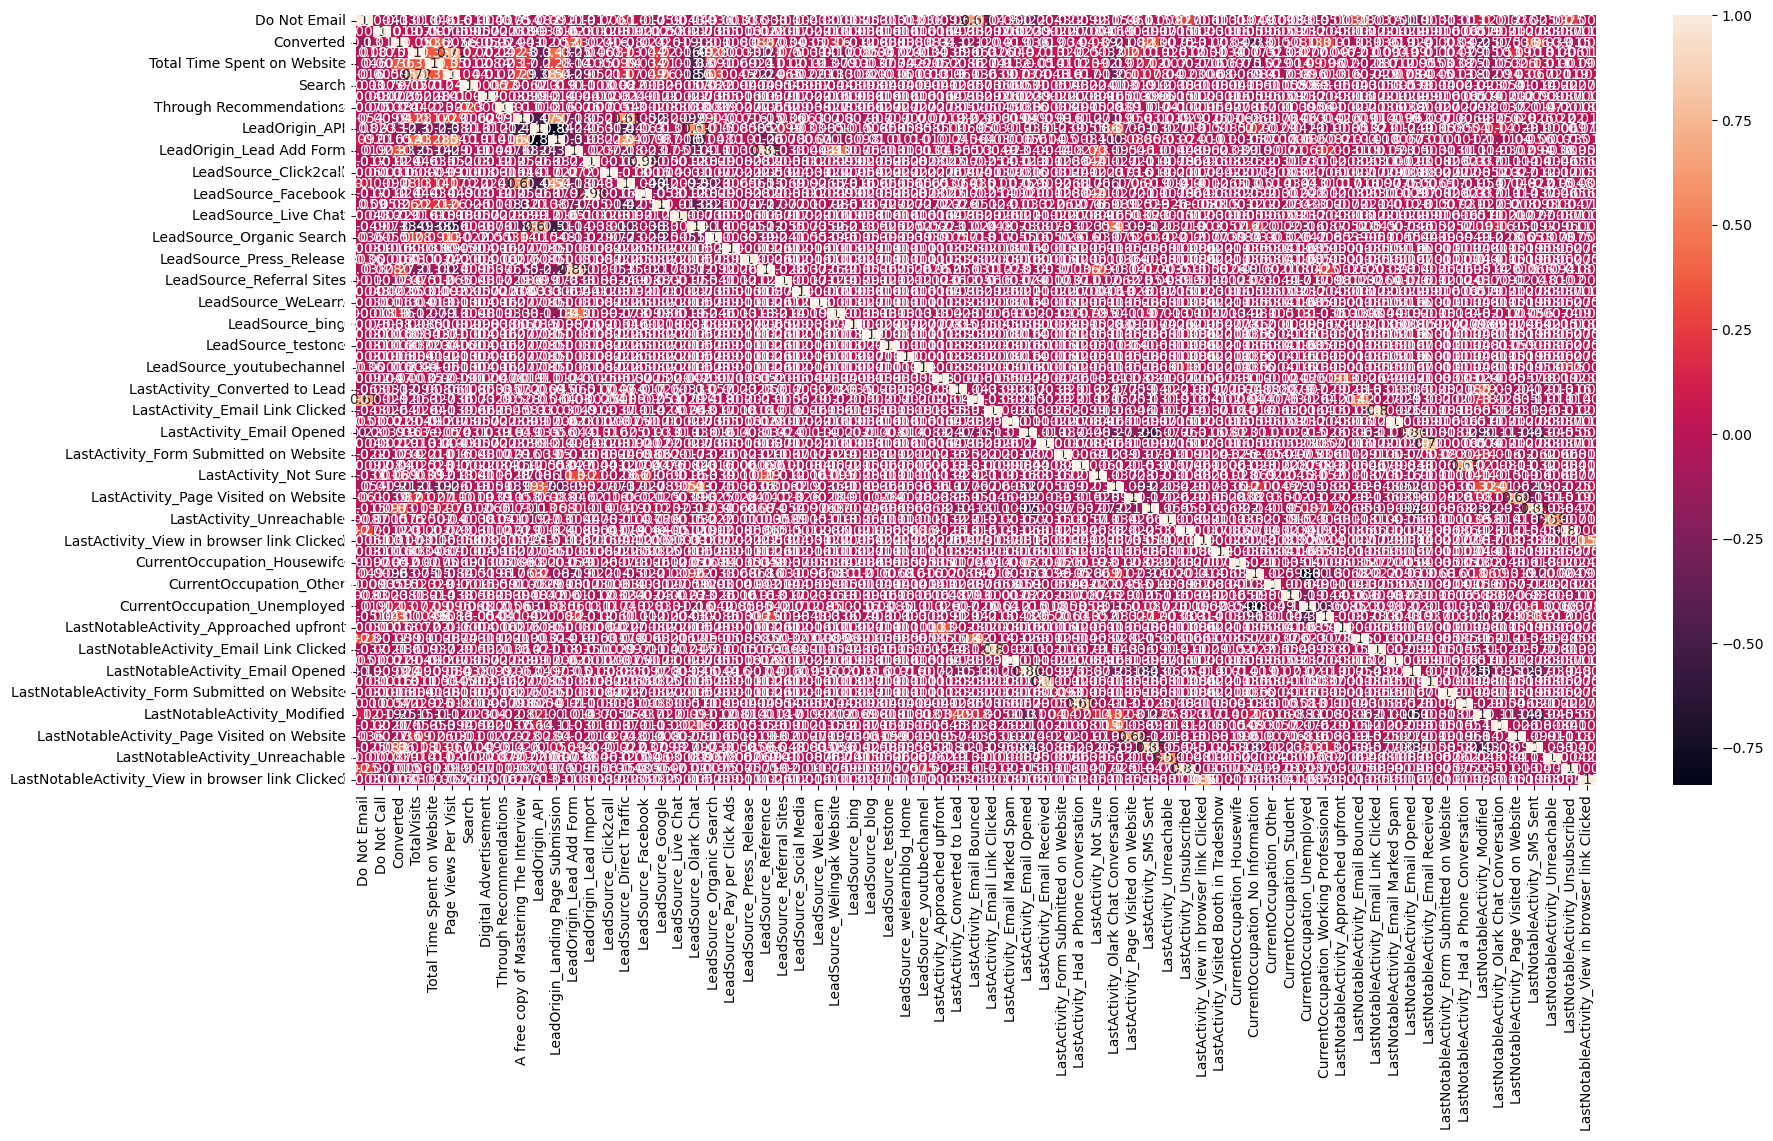

In [179]:
#Check Correlation :-
    # Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_Info.corr(),annot = True)
plt.show()

We have around 71 columns, Heatmap will not be legible. Above heatmap would be of no use

In [180]:
#View correlation table for the dataframe telecom.
Leads_Info.corr()

Do Not Email  Do Not Call  \
Do Not Email                                          1.000000    -0.004322   
Do Not Call                                          -0.004322     1.000000   
Converted                                            -0.132879     0.018809   
TotalVisits                                          -0.018485     0.007508   
Total Time Spent on Website                          -0.045955     0.007012   
...                                                        ...          ...   
LastNotableActivity_Page Visited on Website           0.036091    -0.002668   
LastNotableActivity_SMS Sent                         -0.024659    -0.008260   
LastNotableActivity_Unreachable                      -0.009972    -0.000874   
LastNotableActivity_Unsubscribed                      0.246459    -0.001065   
LastNotableActivity_View in browser link Clicked     -0.003056    -0.000157   

                                                  Converted  TotalVisits  \
Do Not Email                                      -0.132879    -0.018485   
Do Not Call                                        0.018809     0.007508   
Converted                                          1.000000     0.050210   
TotalVisits                                        0.050210     1.000000   
Total Time Spent on Website                        0.359630     0.353603   
...                                                     ...          ...   
LastNotableActivity_Page Visited on Website       -0.035666     0.187058   
LastNotableActivity_SMS Sent                       0.355810     0.017771   
LastNotableActivity_Unreachable                    0.039152     0.013721   
LastNotableActivity_Unsubscribed                  -0.015071     0.006104   
LastNotableActivity_View in browser link Clicked  -0.008329     0.018459   

                                                  Total Time Spent on Website  \
Do Not Email                                                        -0.045955   
Do Not Call                                                          0.007012   
Converted                                                            0.359630   
TotalVisits                                                          0.353603   
Total Time Spent on Website                                          1.000000   
...                                                                       ...   
LastNotableActivity_Page Visited on Website                          0.025699   
LastNotableActivity_SMS Sent                                         0.125829   
LastNotableActivity_Unreachable                                      0.010733   
LastNotableActivity_Unsubscribed                                     0.001878   
LastNotableActivity_View in browser link Clicked                    -0.007578   

                                                  Page Views Per Visit  \
Do Not Email                                                  0.016326   
Do Not Call                                                  -0.005930   
Converted                                                    -0.005636   
TotalVisits                                                   0.723836   
Total Time Spent on Website                                   0.350819   
...                                                                ...   
LastNotableActivity_Page Visited on Website                   0.030100   
LastNotableActivity_SMS Sent                                  0.066744   
LastNotableActivity_Unreachable                               0.021176   
LastNotableActivity_Unsubscribed                              0.018844   
LastNotableActivity_View in browser link Clicked              0.002561   

                                                    Search  \
Do Not Email                                     -0.011025   
Do Not Call                                      -0.000565   
Converted                                        -0.000037   
TotalVisits                                       0.077027   
Total Time Spent

### Step 7: Model Building
Assessing the model with StatsModels

#### Running the Initial Training Model

In [181]:
import statsmodels.api as sm

In [182]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 15 Aug 2023   Deviance:                   1.3585e+05
Time:                        10:06:37   Pearson chi2:                 6.64e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             9.087e+15   8.04e+07   1.13e+08      0.000    9.09e+15    9.09e+15
Do Not Email                                     -6.022e+14   4.55e+06  -1.32e+08      0.000   -6.02e+14   -6.02e+14
Do Not Call                                          0.2968   5.37e-07   5.53e+05      0.000       0.297       0.297
TotalVisits                                       4.498e+14   7.55e+06   5.96e+07      0.000     4.5e+14     4.5e+14
Total Time Spent on Website                       6.724e+14   4.09e+06   1.65e+08      0.000    6.72e+14    6.72e+14
Page Views Per Visit                              2.164e+14   6.35e+06   3.41e+07      0.000    2.16e+14    2.16e+14
Search                                            5.936e+14   2.14e+07   2.78e+07      0.000    5.94e+14    5.94e+14
Digital Advertisement                              3.31e+15   6.73e+07   4.92e+07      0.000    3.31e+15    3.31e+15
Through Recommendations                           4.364e+15   3.39e+07   1.29e+08      0.000    4.36e+15    4.36e+15
A free copy of Mastering The Interview            8.204e+13   2.67e+06   3.07e+07      0.000     8.2e+13     8.2e+13
LeadOrigin_API                                    1.849e+15   2.24e+07   8.27e+07      0.000    1.85e+15    1.85e+15
LeadOrigin_Landing Page Submission                 1.74e+15   2.23e+07   7.79e+07      0.000    1.74e+15    1.74e+15
LeadOrigin_Lead Add Form                           2.51e+15   2.45e+07   1.03e+08      0.000    2.51e+15    2.51e+15
LeadOrigin_Lead Import                            2.988e+15   4.33e+07   6.91e+07      0.000    2.99e+15    2.99e+15
LeadSource_Click2call                            -4.619e+15   7.86e+07  -5.87e+07      0.000   -4.62e+15   -4.62e+15
LeadSource_Direct Traffic                        -5.632e+15   6.72e+07  -8.38e+07      0.000   -5.63e+15   -5.63e+15
LeadSource_Facebook                              -7.675e+15   8.25e+07   -9.3e+07      0.000   -7.68e+15   -7.68e+15
LeadSource_Google                                -5.632e+15   6.72e+07  -8.38e+07      0.000   -5.63e+15   -5.63e+15
LeadSource_Live Chat                             -2.323e+15   8.33e+07  -2.79e+07      0.000   -2.32e+15   -2.32e+15
LeadSource_Olark Chat                            -5.558e+15   6.73e+07  -8.26e+07      0.000   -5.56e+15   -5.56e+15
LeadSource_Organic Search                         -5.79e+15   6.73e+07  -8.61e+07      0.000   -5.79e+15   -5.79e+15
LeadSource_Pay per Click Ads                      -102.6638   9.55e-07  -1.07e+08      0.000    -102.664    -102.664
LeadSource_Press_Release                         -8.853e+15   9.52e+07   -9.3e+07      0.000   -8.85e+15   -8.85e+15
LeadSource_Reference                     

### Step 8: Feature Selection Using RFE

In [183]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [184]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [185]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False])

In [186]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 51),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Search', False, 32),
 ('Digital Advertisement', False, 21),
 ('Through Recommendations', False, 7),
 ('A free copy of Mastering The Interview', False, 46),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 27),
 ('LeadSource_Click2call', False, 15),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 14),
 ('LeadSource_Live Chat', False, 40),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 12),
 ('LeadSource_Pay per Click Ads', False, 49),
 ('LeadSource_Press_Release', False, 45),
 ('LeadSource_Reference', False, 31),
 ('LeadSource_Referral Sites', False, 13),
 ('LeadSource_Social Media', False, 16),
 ('LeadSource_WeLearn', False, 24),

In [187]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Not Sure', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

#### Rebuilding Model - Model 2

In [188]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.8
Date:                Tue, 15 Aug 2023   Deviance:                       5041.5
Time:                        10:07:02   Pearson chi2:                 6.40e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4125
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2843      0.425     -3.021      0.003      -2.118      -0.451
Do Not Email                                    -1.1494      0.172     -6.690      0.000      -1.486      -0.813
TotalVisits                                      1.1814      0.250      4.730      0.000       0.692       1.671
Total Time Spent on Website                      4.6125      0.172     26.795      0.000       4.275       4.950
LeadOrigin_API                                  -0.6597      0.433     -1.522      0.128      -1.509       0.190
LeadOrigin_Landing Page Submission              -1.0385      0.430     -2.414      0.016      -1.882      -0.195
LeadOrigin_Lead Add Form                         2.9774      0.456      6.534      0.000       2.084       3.871
LeadSource_Olark Chat                            1.3924      0.136     10.250      0.000       1.126       1.659
LeadSource_Welingak Website                      2.0949      0.745      2.813      0.005       0.635       3.555
LastActivity_Approached upfront                 23.0811   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
LastActivity_Not Sure                           -1.3958      0.441     -3.162      0.002      -2.261      -0.531
LastActivity_Olark Chat Conversation            -0.8304      0.196     -4.247      0.000      -1.214      -0.447
LastActivity_SMS Sent                            1.2546      0.078     16.099      0.000       1.102       1.407
CurrentOccupation_Housewife                     24.1041   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
CurrentOccupation_No Information                -1.1947      0.089    -13.382      0.000      -1.370      -1.020
CurrentOccupation_Working Professional           2.3766      0.182     13.039      0.000       2.019       2.734
LastNotableActivity_Had a Phone Conversation     3.3534      1.135      2.955      0.003       1.129       5.578
LastNotableActivity_Modified                    -0.8338      0.087     -9.565      0.000      -1.005      -0.663
LastNotableActivity_Olark Chat Conversation     -0.5677      0.375     -1.516      0.130      -1.302       0.166
LastNotableActivity_Page Visited on Website     -0.5222      0.214     -2.443      0.015      -0.941      -0.103
LastNotableActivity_Unreachable                  1.6201      0.556      2.914      0.004       0.531       2.710
================================================================================================================
"""

Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [189]:
col = col.drop('LastActivity_Approached upfront',1)

#### Rebuilding Model - Model 3

In [190]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.1
Date:                Tue, 15 Aug 2023   Deviance:                       5048.2
Time:                        10:08:08   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2857      0.425     -3.024      0.002      -2.119      -0.452
Do Not Email                                    -1.1536      0.172     -6.715      0.000      -1.490      -0.817
TotalVisits                                      1.1837      0.250      4.740      0.000       0.694       1.673
Total Time Spent on Website                      4.6207      0.172     26.854      0.000       4.283       4.958
LeadOrigin_API                                  -0.6621      0.433     -1.528      0.127      -1.512       0.187
LeadOrigin_Landing Page Submission              -1.0384      0.430     -2.414      0.016      -1.881      -0.195
LeadOrigin_Lead Add Form                         2.9873      0.456      6.558      0.000       2.094       3.880
LeadSource_Olark Chat                            1.4025      0.136     10.329      0.000       1.136       1.669
LeadSource_Welingak Website                      2.0858      0.745      2.801      0.005       0.626       3.546
LastActivity_Not Sure                           -1.4164      0.441     -3.209      0.001      -2.281      -0.551
LastActivity_Olark Chat Conversation            -0.8448      0.195     -4.324      0.000      -1.228      -0.462
LastActivity_SMS Sent                            1.2517      0.078     16.063      0.000       1.099       1.404
CurrentOccupation_Housewife                     23.0991   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
CurrentOccupation_No Information                -1.1991      0.089    -13.434      0.000      -1.374      -1.024
CurrentOccupation_Working Professional           2.3727      0.182     13.021      0.000       2.016       2.730
LastNotableActivity_Had a Phone Conversation     3.3546      1.135      2.955      0.003       1.130       5.579
LastNotableActivity_Modified                    -0.8223      0.087     -9.459      0.000      -0.993      -0.652
LastNotableActivity_Olark Chat Conversation     -0.5568      0.375     -1.486      0.137      -1.291       0.177
LastNotableActivity_Page Visited on Website     -0.5233      0.214     -2.447      0.014      -0.943      -0.104
LastNotableActivity_Unreachable                  1.6203      0.556      2.913      0.004       0.530       2.710
================================================================================================================
"""

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [191]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Rebuilding Model - Model 4

In [192]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.5
Date:                Tue, 15 Aug 2023   Deviance:                       5059.0
Time:                        10:09:17   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4109
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2801      0.425     -3.012      0.003      -2.113      -0.447
Do Not Email                                    -1.1576      0.172     -6.741      0.000      -1.494      -0.821
TotalVisits                                      1.1695      0.249      4.688      0.000       0.680       1.658
Total Time Spent on Website                      4.6182      0.172     26.873      0.000       4.281       4.955
LeadOrigin_API                                  -0.6584      0.433     -1.520      0.129      -1.508       0.191
LeadOrigin_Landing Page Submission              -1.0296      0.430     -2.395      0.017      -1.872      -0.187
LeadOrigin_Lead Add Form                         2.9917      0.455      6.570      0.000       2.099       3.884
LeadSource_Olark Chat                            1.3977      0.136     10.302      0.000       1.132       1.664
LeadSource_Welingak Website                      2.0798      0.745      2.793      0.005       0.620       3.539
LastActivity_Not Sure                           -1.4210      0.441     -3.220      0.001      -2.286      -0.556
LastActivity_Olark Chat Conversation            -0.8478      0.195     -4.340      0.000      -1.231      -0.465
LastActivity_SMS Sent                            1.2449      0.078     15.991      0.000       1.092       1.397
CurrentOccupation_No Information                -1.2027      0.089    -13.482      0.000      -1.378      -1.028
CurrentOccupation_Working Professional           2.3665      0.182     12.992      0.000       2.010       2.724
LastNotableActivity_Had a Phone Conversation     3.3466      1.135      2.949      0.003       1.122       5.571
LastNotableActivity_Modified                    -0.8227      0.087     -9.477      0.000      -0.993      -0.653
LastNotableActivity_Olark Chat Conversation     -0.5563      0.374     -1.485      0.137      -1.290       0.178
LastNotableActivity_Page Visited on Website     -0.5275      0.214     -2.467      0.014      -0.947      -0.108
LastNotableActivity_Unreachable                  1.6140      0.556      2.902      0.004       0.524       2.704
================================================================================================================
"""

In [193]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4             LeadOrigin_Landing Page Submission  4.84
3                                 LeadOrigin_API  4.63
1                                    TotalVisits  3.67
6                          LeadSource_Olark Chat  2.84
2                    Total Time Spent on Website  2.37
14                  LastNotableActivity_Modified  2.21
9           LastActivity_Olark Chat Conversation  2.00
5                       LeadOrigin_Lead Add Form  1.69
10                         LastActivity_SMS Sent  1.63
11              CurrentOccupation_No Information  1.63
15   LastNotableActivity_Olark Chat Conversation  1.34
7                    LeadSource_Welingak Website  1.29
8                          LastActivity_Not Sure  1.22
12        CurrentOccupation_Working Professional  1.20
0                                   Do Not Email  1.14
16   LastNotableActivity_Page Visited on Website  1.13
13  LastNotableActivity_Had a Phone Conversation  1.01
17               LastNotableActivity_Unreachable  1.01

Removing column LeadOrigin_Landing Page Submission as it has high VIF and hence is insignificant

In [195]:
col = col.drop('LeadOrigin_Landing Page Submission',1)

#### Rebuilding Model - Model 5

In [196]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.0
Date:                Tue, 15 Aug 2023   Deviance:                       5064.0
Time:                        10:20:06   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.2750      0.108    -21.060      0.000      -2.487      -2.063
Do Not Email                                    -1.1594      0.171     -6.770      0.000      -1.495      -0.824
TotalVisits                                      1.1118      0.248      4.481      0.000       0.625       1.598
Total Time Spent on Website                      4.5885      0.171     26.817      0.000       4.253       4.924
LeadOrigin_API                                   0.3586      0.092      3.900      0.000       0.178       0.539
LeadOrigin_Lead Add Form                         3.9552      0.225     17.607      0.000       3.515       4.395
LeadSource_Olark Chat                            1.3769      0.135     10.190      0.000       1.112       1.642
LeadSource_Welingak Website                      2.0802      0.744      2.795      0.005       0.622       3.539
LastActivity_Not Sure                           -1.2254      0.458     -2.677      0.007      -2.123      -0.328
LastActivity_Olark Chat Conversation            -0.8518      0.195     -4.366      0.000      -1.234      -0.469
LastActivity_SMS Sent                            1.2425      0.078     15.972      0.000       1.090       1.395
CurrentOccupation_No Information                -1.2013      0.089    -13.484      0.000      -1.376      -1.027
CurrentOccupation_Working Professional           2.3634      0.182     12.977      0.000       2.006       2.720
LastNotableActivity_Had a Phone Conversation     3.3345      1.133      2.942      0.003       1.113       5.556
LastNotableActivity_Modified                    -0.8180      0.087     -9.437      0.000      -0.988      -0.648
LastNotableActivity_Olark Chat Conversation     -0.5453      0.374     -1.460      0.144      -1.278       0.187
LastNotableActivity_Page Visited on Website     -0.5226      0.213     -2.449      0.014      -0.941      -0.104
LastNotableActivity_Unreachable                  1.6075      0.556      2.894      0.004       0.519       2.696
================================================================================================================
"""

In [198]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                 LeadOrigin_API  2.61
5                          LeadSource_Olark Chat  2.47
1                                    TotalVisits  2.28
2                    Total Time Spent on Website  2.04
8           LastActivity_Olark Chat Conversation  1.99
13                  LastNotableActivity_Modified  1.94
4                       LeadOrigin_Lead Add Form  1.62
10              CurrentOccupation_No Information  1.54
9                          LastActivity_SMS Sent  1.50
14   LastNotableActivity_Olark Chat Conversation  1.33
6                    LeadSource_Welingak Website  1.29
7                          LastActivity_Not Sure  1.19
11        CurrentOccupation_Working Professional  1.19
15   LastNotableActivity_Page Visited on Website  1.13
0                                   Do Not Email  1.12
16               LastNotableActivity_Unreachable  1.01
12  LastNotableActivity_Had a Phone Conversation  1.00

Removing column LastNotableActivity_Olark Chat Conversation as it has high pvalue and hence is insignificant 

In [199]:
col = col.drop('LastNotableActivity_Olark Chat Conversation',1)

#### Rebuilding Model - Model 6

In [200]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.1
Date:                Tue, 15 Aug 2023   Deviance:                       5066.2
Time:                        10:26:12   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.2778      0.108    -21.100      0.000      -2.489      -2.066
Do Not Email                                    -1.1622      0.171     -6.798      0.000      -1.497      -0.827
TotalVisits                                      1.1050      0.248      4.459      0.000       0.619       1.591
Total Time Spent on Website                      4.5754      0.171     26.798      0.000       4.241       4.910
LeadOrigin_API                                   0.3591      0.092      3.908      0.000       0.179       0.539
LeadOrigin_Lead Add Form                         3.9446      0.224     17.580      0.000       3.505       4.384
LeadSource_Olark Chat                            1.3759      0.135     10.178      0.000       1.111       1.641
LeadSource_Welingak Website                      2.0688      0.744      2.782      0.005       0.611       3.526
LastActivity_Not Sure                           -1.2383      0.457     -2.708      0.007      -2.135      -0.342
LastActivity_Olark Chat Conversation            -1.0035      0.171     -5.874      0.000      -1.338      -0.669
LastActivity_SMS Sent                            1.2453      0.078     16.027      0.000       1.093       1.398
CurrentOccupation_No Information                -1.2063      0.089    -13.551      0.000      -1.381      -1.032
CurrentOccupation_Working Professional           2.3632      0.182     12.971      0.000       2.006       2.720
LastNotableActivity_Had a Phone Conversation     3.3426      1.133      2.949      0.003       1.121       5.564
LastNotableActivity_Modified                    -0.7868      0.084     -9.393      0.000      -0.951      -0.623
LastNotableActivity_Page Visited on Website     -0.5113      0.213     -2.399      0.016      -0.929      -0.094
LastNotableActivity_Unreachable                  1.6170      0.555      2.911      0.004       0.528       2.706
================================================================================================================
"""

In [201]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                 LeadOrigin_API  2.61
5                          LeadSource_Olark Chat  2.47
1                                    TotalVisits  2.27
2                    Total Time Spent on Website  2.04
13                  LastNotableActivity_Modified  1.78
8           LastActivity_Olark Chat Conversation  1.63
4                       LeadOrigin_Lead Add Form  1.62
10              CurrentOccupation_No Information  1.54
9                          LastActivity_SMS Sent  1.50
6                    LeadSource_Welingak Website  1.29
11        CurrentOccupation_Working Professional  1.19
7                          LastActivity_Not Sure  1.18
14   LastNotableActivity_Page Visited on Website  1.13
0                                   Do Not Email  1.12
15               LastNotableActivity_Unreachable  1.01
12  LastNotableActivity_Had a Phone Conversation  1.00

Since the Model 6 seems to be stable with significant pvalues & VIF, we shall go ahead with this model for further analysis

In [202]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.061044
8064    0.090376
4716    0.028539
9117    0.367527
2402    0.470169
1796    0.028210
1120    0.028210
253     0.051276
1491    0.122101
2004    0.339668
dtype: float64

In [203]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06104357, 0.09037626, 0.02853938, 0.36752664, 0.47016871,
       0.02821012, 0.02821012, 0.05127589, 0.1221006 , 0.33966817])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [204]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  LeadId
0          0        0.061044    5493
1          0        0.090376    8064
2          0        0.028539    4716
3          0        0.367527    9117
4          1        0.470169    2402

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [205]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted
0          0        0.061044    5493          0
1          0        0.090376    8064          0
2          0        0.028539    4716          0
3          0        0.367527    9117          0
4          1        0.470169    2402          0

##### Lets check the confusion metrics and accuracy

In [206]:
from sklearn import metrics

In [207]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3478  431]
 [ 717 1694]]


In [ ]:
# Predicted     not_converted    converted
# Actual
# not_converted        3478      431
# converted            717       1694

In [208]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8183544303797469


Accuracy rate is around 82% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Checking VIFs

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                 LeadOrigin_API  2.61
5                          LeadSource_Olark Chat  2.47
1                                    TotalVisits  2.27
2                    Total Time Spent on Website  2.04
13                  LastNotableActivity_Modified  1.78
8           LastActivity_Olark Chat Conversation  1.63
4                       LeadOrigin_Lead Add Form  1.62
10              CurrentOccupation_No Information  1.54
9                          LastActivity_SMS Sent  1.50
6                    LeadSource_Welingak Website  1.29
11        CurrentOccupation_Working Professional  1.19
7                          LastActivity_Not Sure  1.18
14   LastNotableActivity_Page Visited on Website  1.13
0                                   Do Not Email  1.12
15               LastNotableActivity_Unreachable  1.01
12  LastNotableActivity_Had a Phone Conversation  1.00

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [210]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [211]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7026130236416425

In [212]:
# Let us calculate specificity

TN / float(TN+FP)

0.8897416218981837

In [213]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11025837810181632


In [214]:
# positive predictive value 

print (TP / float(TP+FP))

0.7971764705882353


In [215]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8290822407628129


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [216]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [217]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

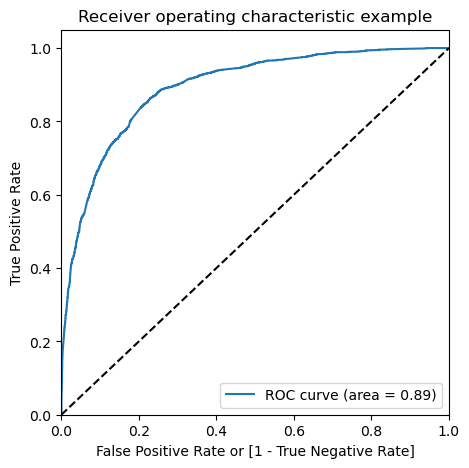

In [218]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [219]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.061044    5493          0    1    0    0    0    0    0   
1          0        0.090376    8064          0    1    0    0    0    0    0   
2          0        0.028539    4716          0    1    0    0    0    0    0   
3          0        0.367527    9117          0    1    1    1    1    0    0   
4          1        0.470169    2402          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [220]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.644620  0.966819  0.445894
0.2   0.2  0.759968  0.917462  0.662829
0.3   0.3  0.802057  0.870178  0.760041
0.4   0.4  0.814241  0.771879  0.840368
0.5   0.5  0.818354  0.702613  0.889742
0.6   0.6  0.807595  0.629614  0.917370
0.7   0.7  0.788924  0.527582  0.950115
0.8   0.8  0.764399  0.433430  0.968534
0.9   0.9  0.717563  0.279967  0.987465


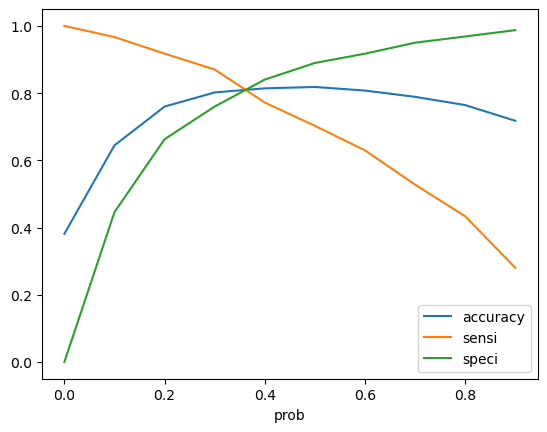

In [221]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [222]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.061044    5493          0    1    0    0    0    0    0   
1          0        0.090376    8064          0    1    0    0    0    0    0   
2          0        0.028539    4716          0    1    0    0    0    0    0   
3          0        0.367527    9117          0    1    1    1    1    0    0   
4          1        0.470169    2402          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    0    0    0    0                1

In [223]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0        0.061044    5493          0    1    0    0    0    0   
1           0        0.090376    8064          0    1    0    0    0    0   
2           0        0.028539    4716          0    1    0    0    0    0   
3           0        0.367527    9117          0    1    1    1    1    0   
4           1        0.470169    2402          0    1    1    1    1    1   
5           0        0.028210    1796          0    1    0    0    0    0   
6           0        0.028210    1120          0    1    0    0    0    0   
7           0        0.051276     253          0    1    0    0    0    0   
8           0        0.122101    1491          0    1    1    0    0    0   
9           1        0.339668    2004          0    1    1    1    1    0   
10          0        0.248904    1792          0    1    1    1    0    0   
11          0        0.088416    1944          0    1    0    0    0    0   
12          0        0.033781    3879          0    1    0    0    0    0   
13          0        0.269670    4084          0    1    1    1    0    0   
14          0        0.111327    1338          0    1    1    0    0    0   
15          1        0.841140    4371          1    1    1    1    1    1   
16          0        0.163065    6941          0    1    1    0    0    0   
17          0        0.211684    6600          0    1    1    1    0    0   
18          0        0.013656    6818          0    1    0    0    0    0   
19          0        0.203079    5930          0    1    1    1    0    0   

    0.5  0.6  0.7  0.8  0.9  final_predicted  lead_score  
0     0    0    0    0    0                0           6  
1     0    0    0    0    0                0           9  
2     0    0    0    0    0                0           3  
3     0    0    0    0    0                0          37  
4     0    0    0    0    0                1          47  
5     0    0    0    0    0                0           3  
6     0    0    0    0    0                0           3  
7     0    0    0    0    0                0           5  
8     0    0    0    0    0                0          12  
9     0    0    0    0    0                0          34  
10    0    0    0    0    0                0          25  
11    0    0    0    0    0                0           9  
12    0    0    0    0    0                0           3  
13    0    0    0    0    0                0          27  
14    0    0    0    0    0                0          11  
15    1    1    1    1    0                1          84  
16    0    0    0    0    0                0          16  
17    0    0    0    0    0                0          21  
18    0    0    0    0    0                0           1  
19    0    0    0    0    0                0          20

In [224]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1941
0     470
Name: final_predicted, dtype: int64

In [225]:
# check the precentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

##### Hence we can see that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [226]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8142405063291139

In [227]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3205,  704],
       [ 470, 1941]], dtype=int64)

In [228]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8050601410203235

In [230]:
# Let us calculate specificity

TN / float(TN+FP)

0.8199027884369404

In [231]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1800972115630596


In [232]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7338374291115312


In [233]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8721088435374149


##### Metrics - Precision and Recall

In [234]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3478,  431],
       [ 717, 1694]], dtype=int64)

In [235]:
from sklearn.metrics import precision_score, recall_score

In [236]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7971764705882353

In [237]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7026130236416425

### Precision and recall tradeoff

In [238]:
from sklearn.metrics import precision_recall_curve

In [239]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [240]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

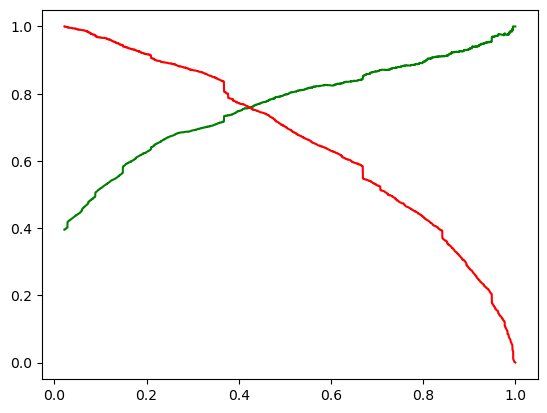

In [241]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [242]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [243]:
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  LeadOrigin_API  \
4664             0       0.0000                     0.000000               1   
5394             0       0.2500                     0.072183               1   
1595             0       0.2500                     0.515405               0   
2111             0       0.4375                     0.229754               0   
9182             0       0.0000                     0.000000               1   

      LeadOrigin_Lead Add Form  LeadSource_Olark Chat  \
4664                         0                      1   
5394                         0                      1   
1595                         0                      0   
2111                         0                      0   
9182                         0                      1   

      LeadSource_Welingak Website  LastActivity_Not Sure  \
4664                            0                      0   
5394                            0                      0   
1595                            0                      0   
2111                            0                      0   
9182                            0                      0   

      LastActivity_Olark Chat Conversation  LastActivity_SMS Sent  \
4664                                     0                      0   
5394                                     0                      0   
1595                                     0                      0   
2111                                     0                      0   
9182                                     0                      1   

      CurrentOccupation_No Information  \
4664                                 0   
5394                                 1   
1595                                 0   
2111                                 1   
9182                                 0   

      CurrentOccupation_Working Professional  \
4664                                       0   
5394                                       0   
1595                                       1   
2111                                       0   
9182                                       0   

      LastNotableActivity_Had a Phone Conversation  \
4664                                             0   
5394                                             0   
1595                                             0   
2111                                             0   
9182                                             0   

      LastNotableActivity_Modified  \
4664                             0   
5394                             1   
1595                             1   
2111                             0   
9182                             1   

      LastNotableActivity_Page Visited on Website  \
4664                                            0   
5394                                            0   
1595                                            0   
2111                                            0   
9182                                            0   

      LastNotableActivity_Unreachable  
4664                                0  
5394                                0  
1595                                0  
2111                                0  
9182                                0

In [244]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [245]:
y_test_pred = res.predict(X_test_sm)

In [246]:
y_test_pred[:10]

4664    0.367527
5394    0.126810
1595    0.873585
2111    0.124610
9182    0.478932
1055    0.661853
541     0.100338
446     0.988887
3728    0.017018
4249    0.007367
dtype: float64

In [247]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [248]:
# Let's see the head

y_pred_1.head()

0
4664  0.367527
5394  0.126810
1595  0.873585
2111  0.124610
9182  0.478932

In [249]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [250]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [251]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [252]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [253]:
y_pred_final.head()

Converted  LeadId         0
0          0    4664  0.367527
1          0    5394  0.126810
2          1    1595  0.873585
3          0    2111  0.124610
4          0    9182  0.478932

In [254]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [256]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['LeadId', 'Converted', 'Converted_Prob'])

In [257]:
y_pred_final.head()

LeadId  Converted  Converted_Prob
0    4664          0        0.367527
1    5394          0        0.126810
2    1595          1        0.873585
3    2111          0        0.124610
4    9182          0        0.478932

In [258]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [259]:
y_pred_final.head()

LeadId  Converted  Converted_Prob  final_predicted
0    4664          0        0.367527                0
1    5394          0        0.126810                0
2    1595          1        0.873585                1
3    2111          0        0.124610                0
4    9182          0        0.478932                1

In [260]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

LeadId  Converted  Converted_Prob  final_predicted  lead_score
0     4664          0        0.367527                0          37
1     5394          0        0.126810                0          13
2     1595          1        0.873585                1          87
3     2111          0        0.124610                0          12
4     9182          0        0.478932                1          48
5     1055          1        0.661853                1          66
6      541          0        0.100338                0          10
7      446          1        0.988887                1          99
8     3728          0        0.017018                0           2
9     4249          0        0.007367                0           1
10    9123          0        0.174267                0          17
11    5036          1        0.955457                1          96
12    2015          1        0.486299                1          49
13    2112          0        0.223340                0          22
14    4118          0        0.028210                0           3
15    6195          0        0.090525                0           9
16    2305          1        0.474087                1          47
17    8329          0        0.148152                0          15
18    7651          0        0.631277                1          63
19    2673          1        0.994910                1          99

In [261]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    867
0    199
Name: final_predicted, dtype: int64

In [262]:
# check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

##### Hence we can see that the final prediction of conversions have a target rate of 79% (78.5%) (Around 1 % short of the predictions made on training data set)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [263]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8146917681801402

In [264]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1340,  303],
       [ 199,  867]], dtype=int64)

In [265]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [266]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8133208255159474

In [267]:
# Let us calculate specificity
TN / float(TN+FP)

0.815581253804017

##### Precision and Recall metrics for the test set 

In [268]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7410256410256411
recall  0.8133208255159474


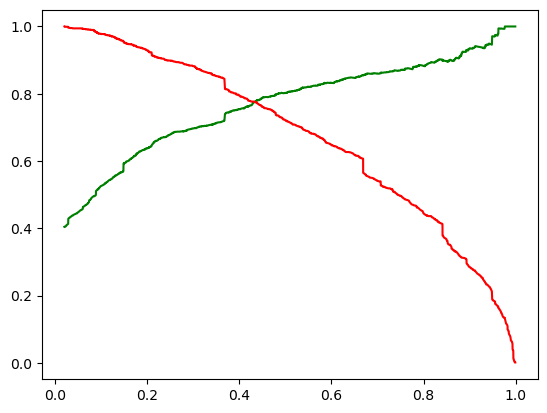

In [269]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()